In [2]:
from os import listdir
from os.path import join
import librosa
import numpy as np
import parameters as par
import matplotlib.pyplot as plt
import python_speech_features as psf

In [3]:
# Constants
DATASET_PATH = 'C:\\Users\\elioe\\Documents\\wake-word-detection-model\\dataset'

In [4]:
# List of words in dataset
words = [
    'backward',
    'bed',
    'bird',
    'cat',
    'dog',
    'down',
    'eight',
    'five',
    'follow',
    'forward',
    'four',
    'go',
    'happy',
    'house',
    'learn',
    'left',
    'marvin',
    'nine',
    'no',
    'off',
    'on',
    'one',
    'right',
    'seven',
    'sheila',
    'six',
    'stop',
    'three',
    'tree',
    'two',
    'up',
    'visual',
    'wow',
    'yes',
    'zero',
    '_background_noise_'
]

In [5]:
# List of labels
labels = par.WORDS
print(labels)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']


In [6]:
def apply_noise(file_path):
    # Load audio file
    signal, sample_rate = librosa.load(file_path, sr=par.SAMPLE_RATE)

    # Add random background noise
    list_of_noise = listdir(join(DATASET_PATH, '_background_noise_'))
    list_of_noise.remove('README.md')
    selected_file = np.random.choice(list_of_noise)
    noise, _ = librosa.load(join(DATASET_PATH, '_background_noise_', selected_file))
    noise_start = np.random.randint(0, len(noise) - 16000)
    noise = noise[noise_start:noise_start + len(signal)]
    #print(noise)

    # Setup noise volume
    noise_volume = np.random.uniform(0.0, 0.1)

    # Add noise to signal
    signal = signal + noise_volume * noise
    return signal, sample_rate

In [7]:
# Extract features for each file in dataset
features = []
targets = []
count = 0

for label in labels:
    print(f'Extracting features for {label}...')

    for i, filename in enumerate(listdir(join(DATASET_PATH, label))):
        if i > 500:
            break

        filepath = join(DATASET_PATH, label, filename)

        # Load audio file without noise
        signal, sample_rate = librosa.load(filepath, sr=par.SAMPLE_RATE)

        # Load audio file with random noise applied
        #signal, sample_rate = apply_noise(filepath)

        # Drop audio with sample rate lower than expected
        if len(signal) >= par.SAMPLE_RATE:

            # Cut signal to the same length
            signal = signal[:par.SAMPLE_RATE]

        else:
            # Pad signal with zeros
            signal = np.pad(signal, (0, par.SAMPLE_RATE - len(signal)), 'constant')
            count += 1

        # Extract MFCCs
        #MFCCs = librosa.feature.mfcc(y=signal, sr=par.SAMPLE_RATE, n_mfcc=13, n_fft=400, hop_length=par.HOP_SIZE)
        # MFCCs = psf.base.mfcc(
        #     signal,
        #     samplerate=sample_rate,
        #     #winlen=par.N_FFT / sample_rate,
        #     #winstep=par.HOP_SIZE / sample_rate,
        #     numcep=par.NUM_MFCC,
        #     nfilt=26,
        #     nfft=par.N_FFT,
        #     preemph=0.0,
        #     ceplifter=0,
        #     appendEnergy=False,
        #     winfunc=np.hanning
        # )

        # Append features and targets
        # Transpose the MFCC matrix to have shape (# of MFCCs, # of frames)
        #features.append(MFCCs.transpose())
        features.append(signal)
        targets.append(labels.index(label))


print(f'Padded {count} files')

Extracting features for backward...
Extracting features for bed...
Extracting features for bird...
Extracting features for cat...
Extracting features for dog...
Extracting features for down...
Extracting features for eight...
Extracting features for five...
Extracting features for follow...
Extracting features for forward...
Extracting features for four...
Extracting features for go...
Extracting features for happy...
Extracting features for house...
Extracting features for learn...
Extracting features for left...
Extracting features for marvin...
Extracting features for nine...
Extracting features for no...
Extracting features for off...
Extracting features for on...
Extracting features for one...
Extracting features for right...
Extracting features for seven...
Extracting features for sheila...
Extracting features for six...
Extracting features for stop...
Extracting features for three...
Extracting features for tree...
Extracting features for two...
Extracting features for up...
Ext

In [8]:
# Print some stats
print(f'Extracted {features[32].shape} for {labels[32]}')
#print(features[32])

Extracted (16000,) for wow


In [12]:
# Save features and targets
np.savez('features_non_processed.npz', features=features, targets=targets)

(23211,)
16000
(13, 32)


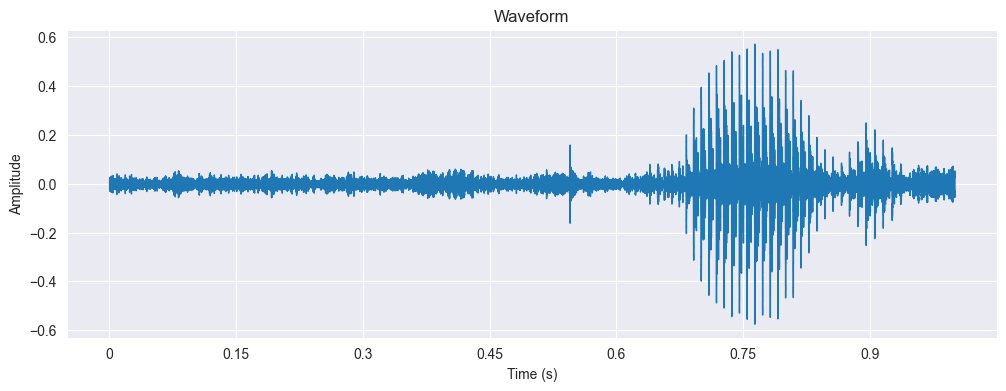

In [10]:
TEST_PATH = 'D:\\Downloads\\marvin_1.wav'
signal, sample_rate = apply_noise(TEST_PATH)
#signal, sample_rate = librosa.load(TEST_PATH, sr=par.SAMPLE_RATE)
print(signal.shape)
print(sample_rate)

signal = signal[:par.SAMPLE_RATE]

MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, n_fft=400, hop_length=par.HOP_SIZE)
# MFCCs = psf.base.mfcc(
#                 signal,
#                 samplerate=sample_rate,
#                 #winlen=par.N_FFT / sample_rate,
#                 #winstep=par.HOP_SIZE / sample_rate,
#                 numcep=par.NUM_MFCC,
#                 nfilt=par.NUM_FILTERS,
#                 nfft=par.N_FFT,
#                 preemph=0.0,
#                 ceplifter=0,
#                 appendEnergy=False,
#                 winfunc=np.hanning
#             )

print(MFCCs.shape)

# plot signal
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sample_rate)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()


In [11]:
apply_noise('D:\\Downloads\\marvin_1.wav')

(array([ 0.00131173,  0.00176553,  0.00084569, ..., -0.00143153,
        -0.00026771,  0.00045522], dtype=float32),
 16000)